In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
medical = pd.read_csv("insurance.csv")
medical

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
type(medical)


pandas.core.frame.DataFrame

In [4]:
medical.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
medical.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
medical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
### summarizing about the columns separately which are object or categorical type


In [8]:
print(medical.describe(include = ['object']))


         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [9]:
## We have to predict the expense column i.e. how it varies with the change of other columns or attributes


In [10]:
# Histogram plot


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

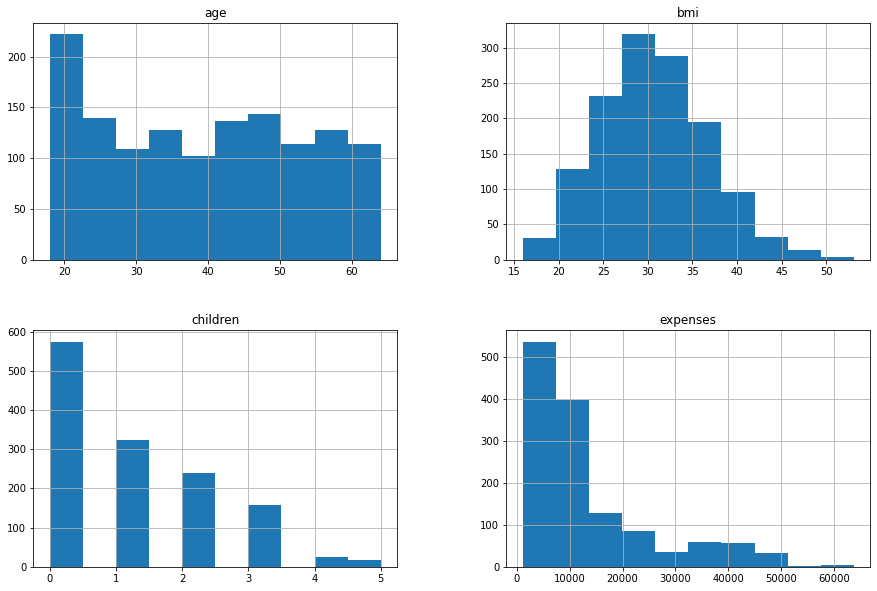

In [11]:
medical.hist(bins = 10, figsize=(15,10))


In [12]:
# Regression Plot


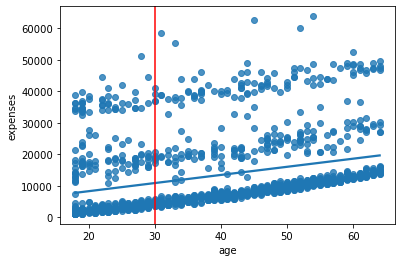

In [13]:
sns.regplot(x='age', y='expenses', data=medical,ci=None)
plt.axvline(30, color='r')

# From this graph we can say that with the increase of age the expense is also increasing. In any particular age there are three distinguishable expense cluster and in the lowest cluster the dense of population is highest which is gradually decreasing for higher expense clusters. An example is shown here with the age '30'

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

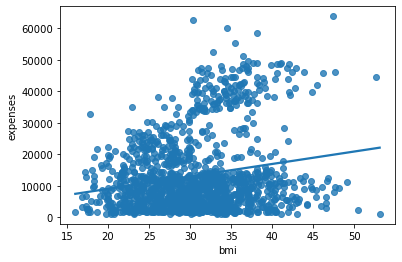

In [14]:
sns.regplot(x='bmi', y='expenses', data=medical,ci=None)


# In this graph also we can see that the expense is gradually increasing with the increase of bmi.

<AxesSubplot:xlabel='sex', ylabel='count'>

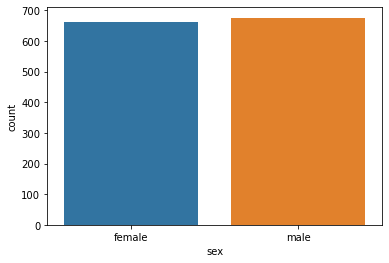

In [15]:
sns.countplot(x='sex',data=medical)

# Count of Male and Female are almost equal


Text(0, 0.5, 'mean_expenses')

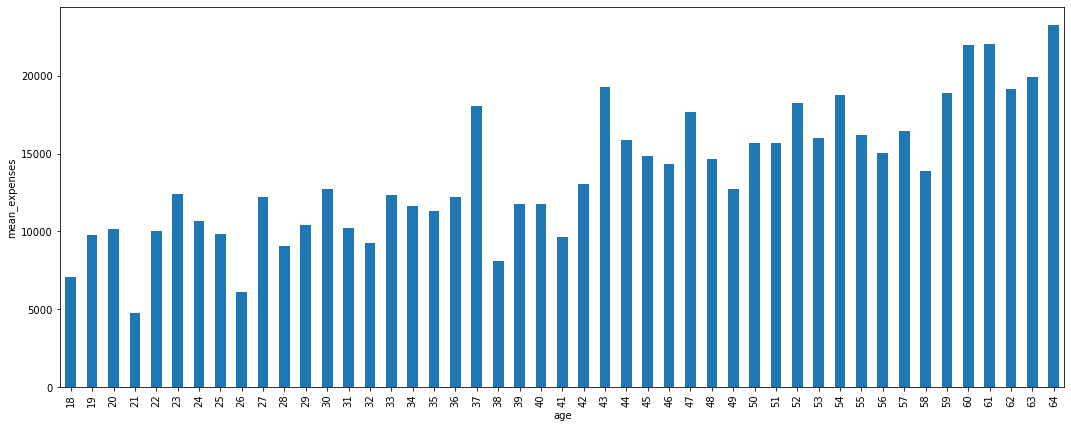

In [16]:
medical.groupby(by = 'age')['expenses'].mean().plot(kind = 'bar',figsize=(18,7))
plt.ylabel('mean_expenses')

# If checking the mean expense for individual age group then we can see that as age increases the mean expense also increases


In [17]:
#Correlation


In [18]:
corr = medical.corr()
corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

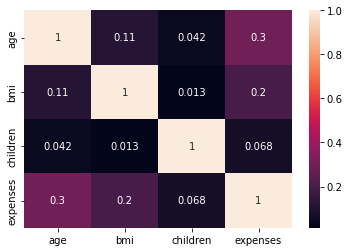

In [19]:
sns.heatmap(medical.corr(),annot= True)


# It can be said from the correlation values that , expenses are more likely to be impacted by age . Also it can be said that age and bmi have a very weak positive correlation with expense
Making some age category which can help in understanding categorywise mean expense
Below we are checking few properties of age attribute and categorizing it.


In [20]:
np.min(medical.age)

18

In [21]:
np.max(medical.age)


64

In [22]:
len(medical.age.unique())


47

In [23]:
len(np.ceil(medical.age).unique())


47

In [24]:
medical['age_cat']=np.ceil(medical.age / 18)




In [25]:
len(medical.age_cat.value_counts().sort_index(ascending= True))


4

In [26]:
medical.age_cat.value_counts().sort_index(ascending = True)


1.0     69
2.0    530
3.0    497
4.0    242
Name: age_cat, dtype: int64

In [27]:
count = medical.age_cat.value_counts()
count

2.0    530
3.0    497
4.0    242
1.0     69
Name: age_cat, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

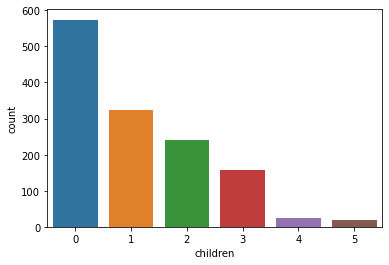

In [28]:
sns.countplot(x ='children', data = medical)


In [29]:
medical['children'].value_counts()


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

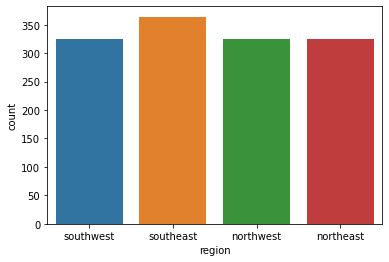

In [30]:
sns.countplot(x = 'region', data= medical)


In [31]:
medical['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

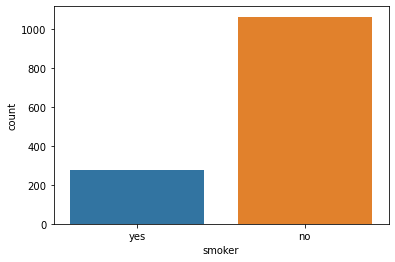

In [32]:
sns.countplot(x = 'smoker', data=medical)


In [33]:
medical['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [34]:
medical


,age,sex,bmi,children,smoker,region,expenses,age_cat
0,19,female,27.9,0,yes,southwest,16884.92,2.0
1,18,male,33.8,1,no,southeast,1725.55,1.0
2,28,male,33.0,3,no,southeast,4449.46,2.0
3,33,male,22.7,0,no,northwest,21984.47,2.0
4,32,male,28.9,0,no,northwest,3866.86,2.0
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,3.0
1334,18,female,31.9,0,no,northeast,2205.98,1.0
1335,18,female,36.9,0,no,southeast,1629.83,1.0
1336,21,female,25.8,0,no,southwest,2007.95,2.0


In [35]:
m1 = medical[medical['age_cat']==1.0].sort_index(ascending = True)


In [36]:
m1['age'].unique()


array([18], dtype=int64)

In [37]:
m1['age'].value_counts()


18    69
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

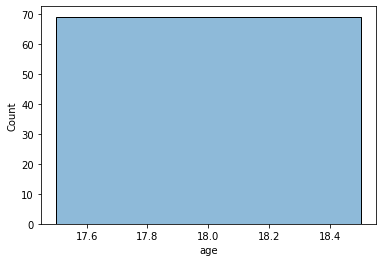

In [38]:
sns.histplot(x='age',data=m1, kde=True)


In [39]:
m2 = medical[medical['age_cat']==2.0].sort_index(ascending = True)


In [40]:
m2['age'].nunique()


18

In [41]:
m2['age'].unique()


array([19, 28, 33, 32, 31, 25, 23, 27, 30, 34, 22, 26, 35, 24, 36, 21, 20,
       29], dtype=int64)

In [42]:
m2['age'].value_counts()


19    68
20    29
22    28
21    28
24    28
25    28
23    28
27    28
26    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

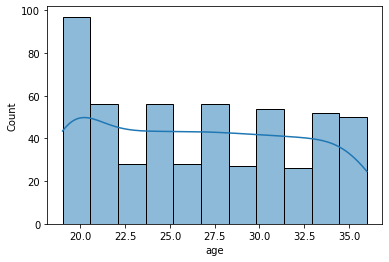

In [43]:
sns.histplot(x='age', data=m2, kde=True)


In [44]:
m3 = medical[medical['age_cat']==3.0].sort_index(ascending = True)


In [45]:
m3

,age,sex,bmi,children,smoker,region,expenses,age_cat
6,46,female,33.4,1,no,southeast,8240.59,3.0
7,37,female,27.7,3,no,northwest,7281.51,3.0
8,37,male,29.8,2,no,northeast,6406.41,3.0
16,52,female,30.8,1,no,northeast,10797.34,3.0
24,37,male,28.0,2,no,northwest,6203.90,3.0
...,...,...,...,...,...,...,...,...
1326,42,female,32.9,0,no,northeast,7050.02,3.0
1327,51,male,30.0,1,no,southeast,9377.90,3.0
1329,52,male,38.6,2,no,southwest,10325.21,3.0
1332,52,female,44.7,3,no,southwest,11411.69,3.0


In [46]:
m3['age'].nunique()


18

In [47]:
m3['age'].unique()


array([46, 37, 52, 41, 38, 48, 40, 53, 43, 44, 45, 54, 49, 47, 51, 42, 50,
       39], dtype=int64)

In [48]:
m3['age'].value_counts()


46    29
52    29
50    29
48    29
51    29
47    29
45    29
54    28
53    28
49    28
42    27
44    27
43    27
40    27
41    27
37    25
38    25
39    25
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

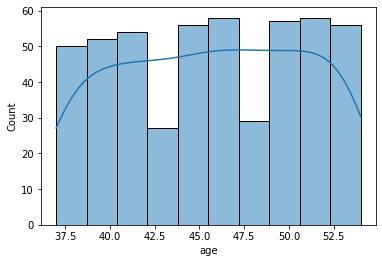

In [49]:
sns.histplot(x='age', data=m3, kde=True)


In [50]:
m3['age'].min(), m3['age'].max()


(37, 54)

In [51]:
m4 = medical[medical['age_cat']==4.0]


In [52]:
m4

,age,sex,bmi,children,smoker,region,expenses,age_cat
9,60,female,25.8,0,no,northwest,28923.14,4.0
11,62,female,26.3,0,yes,southeast,27808.73,4.0
13,56,female,39.8,0,no,southeast,11090.72,4.0
18,56,male,40.3,0,no,southwest,10602.39,4.0
20,60,female,36.0,0,no,northeast,13228.85,4.0
...,...,...,...,...,...,...,...,...
1321,62,male,26.7,0,yes,northeast,28101.33,4.0
1322,62,male,38.8,0,no,southeast,12981.35,4.0
1325,61,male,33.5,0,no,northeast,13143.34,4.0
1330,57,female,25.7,2,no,southeast,12629.17,4.0


In [53]:
m4['age'].unique()


array([60, 62, 56, 59, 63, 55, 58, 64, 61, 57], dtype=int64)

In [54]:
m4['age'].value_counts()


56    26
55    26
57    26
59    25
58    25
60    23
62    23
63    23
61    23
64    22
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

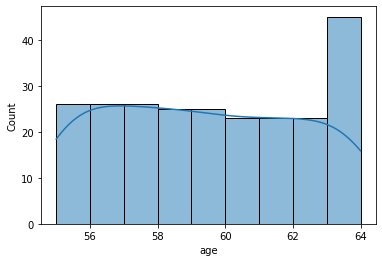

In [55]:
sns.histplot(x='age', data=m4, kde=True)


In [56]:
# Checking for the proportion of each age category in the dataset
medical.age_cat.value_counts().sort_index(ascending = True) / len(medical)

1.0    0.051570
2.0    0.396114
3.0    0.371450
4.0    0.180867
Name: age_cat, dtype: float64

In [57]:
## In age category 2 the count of people is higher than other categories


# Similar categorization for BMI as after age expense is impacted by bmi.


In [58]:
np.min(medical.bmi)


16.0

In [59]:
np.max(medical.bmi)


53.1

In [60]:
len(medical['bmi'].unique())


275

In [61]:
## Similar operation performed on BMI as age to check which category has higher average medical expense 


In [62]:
medical['bmi_cat']=np.ceil(medical.bmi / 16)


In [63]:
medical.bmi_cat.value_counts().sort_index(ascending=True)


1.0      1
2.0    802
3.0    530
4.0      5
Name: bmi_cat, dtype: int64

In [64]:
medical.bmi_cat.value_counts().sort_index(ascending = True) / len(medical)


1.0    0.000747
2.0    0.599402
3.0    0.396114
4.0    0.003737
Name: bmi_cat, dtype: float64

In [65]:
medical


,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
0,19,female,27.9,0,yes,southwest,16884.92,2.0,2.0
1,18,male,33.8,1,no,southeast,1725.55,1.0,3.0
2,28,male,33.0,3,no,southeast,4449.46,2.0,3.0
3,33,male,22.7,0,no,northwest,21984.47,2.0,2.0
4,32,male,28.9,0,no,northwest,3866.86,2.0,2.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,3.0,2.0
1334,18,female,31.9,0,no,northeast,2205.98,1.0,2.0
1335,18,female,36.9,0,no,southeast,1629.83,1.0,3.0
1336,21,female,25.8,0,no,southwest,2007.95,2.0,2.0


In [66]:
b1 = medical[medical['bmi_cat']==1.0]
b1

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
172,18,male,16.0,0,no,northeast,1694.8,1.0,1.0


In [67]:
b1['bmi'].nunique()


1

In [68]:
b1['bmi'].value_counts()


16.0    1
Name: bmi, dtype: int64

In [69]:
b2 = medical[medical['bmi_cat']==2.0]
b2

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
0,19,female,27.9,0,yes,southwest,16884.92,2.0,2.0
3,33,male,22.7,0,no,northwest,21984.47,2.0,2.0
4,32,male,28.9,0,no,northwest,3866.86,2.0,2.0
5,31,female,25.7,0,no,southeast,3756.62,2.0,2.0
7,37,female,27.7,3,no,northwest,7281.51,3.0,2.0
...,...,...,...,...,...,...,...,...,...
1330,57,female,25.7,2,no,southeast,12629.17,4.0,2.0
1333,50,male,31.0,3,no,northwest,10600.55,3.0,2.0
1334,18,female,31.9,0,no,northeast,2205.98,1.0,2.0
1336,21,female,25.8,0,no,southwest,2007.95,2.0,2.0


In [70]:
b2['bmi'].nunique()


143

In [71]:
# checking the min and max value of bmi category 2.0
b2['bmi'].min(), b2['bmi'].max()

(16.8, 32.0)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

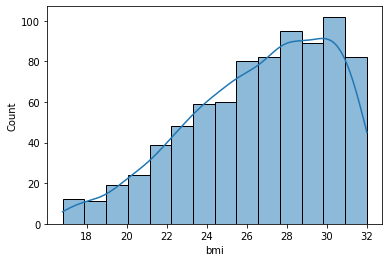

In [72]:
sns.histplot(x='bmi',data=b2, kde=True)


In [73]:
b3 = medical[medical['bmi_cat']==3.0]


In [74]:
b3

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
1,18,male,33.8,1,no,southeast,1725.55,1.0,3.0
2,28,male,33.0,3,no,southeast,4449.46,2.0,3.0
6,46,female,33.4,1,no,southeast,8240.59,3.0,3.0
12,23,male,34.4,0,no,southwest,1826.84,2.0,3.0
13,56,female,39.8,0,no,southeast,11090.72,4.0,3.0
...,...,...,...,...,...,...,...,...,...
1326,42,female,32.9,0,no,northeast,7050.02,3.0,3.0
1329,52,male,38.6,2,no,southwest,10325.21,3.0,3.0
1331,23,female,33.4,0,no,southwest,10795.94,2.0,3.0
1332,52,female,44.7,3,no,southwest,11411.69,3.0,3.0


In [75]:
b3['bmi'].nunique()


126

In [76]:
# checking the min and max value of bmi category 2.0
b3['bmi'].min(), b3['bmi'].max()

(32.1, 47.7)

In [77]:
b3['bmi'].unique()


array([33.8, 33. , 33.4, 34.4, 39.8, 42.1, 40.3, 35.3, 36. , 32.4, 34.1,
       32.8, 36.3, 35.6, 36.4, 36.7, 39.9, 36.6, 37.1, 37.3, 38.7, 34.8,
       35.2, 33.6, 37. , 33.7, 39.1, 36.2, 34. , 35.5, 38.3, 37.6, 41.2,
       39.5, 35.1, 35.7, 32.2, 33.9, 37.4, 34.7, 35.9, 32.5, 38.8, 37.7,
       36.9, 39.6, 33.2, 41.5, 33.3, 41.9, 32.1, 39.3, 36.1, 38.1, 38.4,
       34.2, 40.2, 42.4, 40.6, 36.8, 45.5, 37.5, 38. , 34.9, 33.1, 40.9,
       36.5, 34.5, 32.3, 35.8, 43.9, 32.9, 43.3, 38.2, 47.5, 39.2, 46.8,
       32.7, 33.5, 43. , 38.6, 46.5, 32.6, 41.3, 34.3, 43.4, 44.2, 39.4,
       40.5, 38.9, 47.4, 35.4, 46.7, 46.2, 44.8, 43.1, 45.4, 37.8, 42.5,
       39. , 39.7, 35. , 42.7, 40.8, 41.7, 44.7, 40.7, 37.9, 34.6, 41.1,
       41.8, 42.2, 41.4, 42.9, 47.6, 43.7, 44. , 37.2, 46.1, 40. , 45.3,
       47.7, 42.8, 45.9, 44.9, 40.4])

In [78]:
b3['bmi'].value_counts()


33.3    17
32.3    15
37.1    13
34.1    12
32.8    11
        ..
46.2     1
46.7     1
43.4     1
47.4     1
42.5     1
Name: bmi, Length: 126, dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

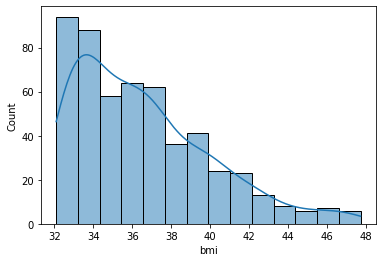

In [79]:
sns.histplot(x='bmi',data=b3,kde=True)


In [80]:
b4 = medical[medical['bmi_cat']==4.0]


In [81]:
b4

,age,sex,bmi,children,smoker,region,expenses,age_cat,bmi_cat
116,58,male,49.1,0,no,southeast,11381.33,4.0,4.0
286,46,female,48.1,2,no,northeast,9432.93,3.0,4.0
847,23,male,50.4,1,no,southeast,2438.06,2.0,4.0
1047,22,male,52.6,1,yes,southeast,44501.40,2.0,4.0
1317,18,male,53.1,0,no,southeast,1163.46,1.0,4.0


In [82]:
b4['bmi'].value_counts()


49.1    1
48.1    1
50.4    1
52.6    1
53.1    1
Name: bmi, dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

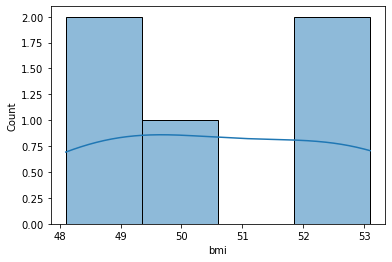

In [83]:
sns.histplot(x='bmi', data=b4,kde=True)


<AxesSubplot:xlabel='bmi_cat', ylabel='count'>

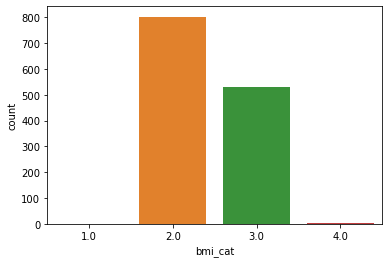

In [84]:
sns.countplot(x= 'bmi_cat', data= medical)


<AxesSubplot:xlabel='age'>

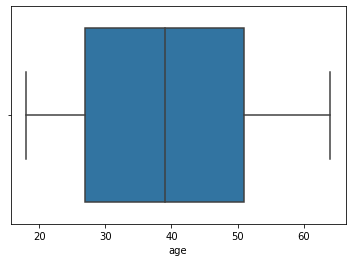

In [85]:
sns.boxplot(x='age', data=medical)


# Only BMI has few outliers , age doesn't have any outlie



age_cat


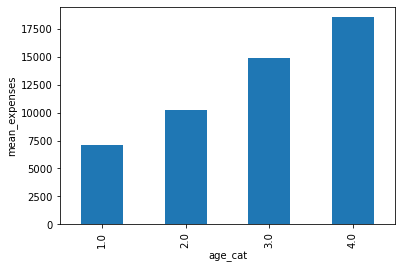

sex


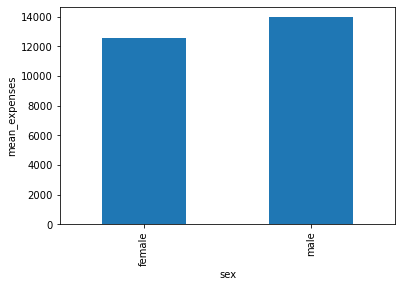

region


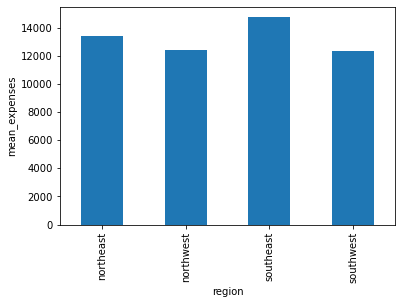

bmi_cat


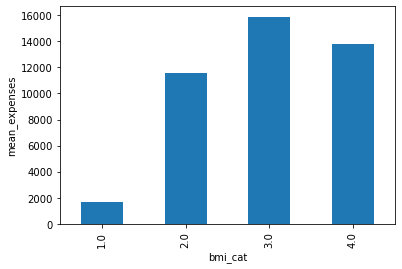

children


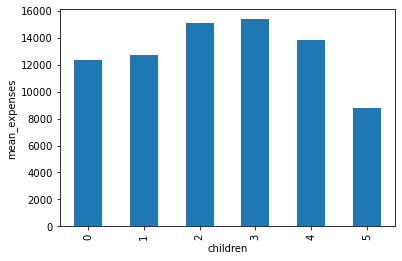

smoker


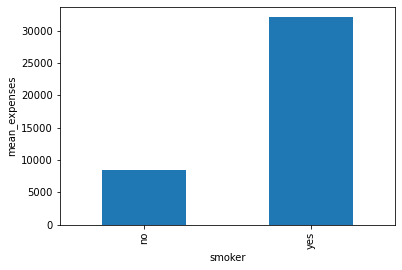

In [86]:
lst = ['age_cat','sex','region','bmi_cat','children', 'smoker']
for i in lst:
    data = medical.groupby(by = i)['expenses'].mean().plot(kind = 'bar')
    print(i)
    plt.ylabel('mean_expenses')
    plt.show()

Mean expense is highest for the age category 4.0 among all other age categories.
Mean expense is highest for Male among all genders.
Mean expense is higher for southwest region among all other regions.
Mean expense is higher for the bmi category 3.0 among all other categories of bmi.
Mean expense is higher for the category having 3 children followed by 2 children.

In [87]:
#Checking for the proportion of each age category in the dataset


In [88]:
medical.age_cat.value_counts().sort_index(ascending = True) / len(medical)


1.0    0.051570
2.0    0.396114
3.0    0.371450
4.0    0.180867
Name: age_cat, dtype: float64

In [89]:
medical = medical.drop('age_cat',axis=1)
medical = medical.drop('bmi_cat',axis=1)

In [90]:
medical


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [91]:
X = medical.drop('expenses', axis = 1)
y = medical['expenses']

In [92]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [93]:
y.head()


0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

# Splitting into test data and train data


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

# checking whether percentage of train and test data set are according to the given ratio or not


In [95]:
(len(X_train)/len(medical))*100

79.97010463378177

In [96]:
(len(X_test)/len(medical))*100

20.029895366218238

In [97]:
X_test

,age,sex,bmi,children,smoker,region
764,45,female,25.2,2,no,northeast
887,36,female,30.0,0,no,northwest
890,64,female,26.9,0,yes,northwest
1293,46,male,25.7,3,no,northwest
259,19,male,31.9,0,yes,northwest
...,...,...,...,...,...,...
109,63,male,35.1,0,yes,southeast
575,58,female,27.2,0,no,northwest
535,38,male,28.0,1,no,northeast
543,54,female,47.4,0,yes,southeast


In [98]:
X_train


,age,sex,bmi,children,smoker,region
560,46,female,20.0,2,no,northwest
1285,47,female,24.3,0,no,northeast
1142,52,female,24.9,0,no,southeast
969,39,female,34.3,5,no,southeast
486,54,female,21.5,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.4,4,no,northeast
1130,39,female,23.9,5,no,southeast
1294,58,male,25.2,0,no,northeast
860,37,female,47.6,2,yes,southwest


In [99]:
y_train


560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [100]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

In [101]:
#Data Preprocessing


In [102]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.5+ KB


In [103]:
#Separating numerical and categorical attributes


In [104]:
X_train_num = X_train.drop(['sex','smoker','region'],axis = 1)


In [105]:
X_train_num

,age,bmi,children
560,46,20.0,2
1285,47,24.3,0
1142,52,24.9,0
969,39,34.3,5
486,54,21.5,3
...,...,...,...
1095,18,31.4,4
1130,39,23.9,5
1294,58,25.2,0
860,37,47.6,2


In [106]:
X_train_cat = X_train[['sex','smoker','region']]
X_train_cat

,sex,smoker,region
560,female,no,northwest
1285,female,no,northeast
1142,female,no,southeast
969,female,no,southeast
486,female,no,northwest
...,...,...,...
1095,female,no,northeast
1130,female,no,southeast
1294,male,no,northeast
860,female,yes,southwest


In [107]:
X_train_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   bmi       1070 non-null   float64
 2   children  1070 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.4 KB


In [108]:
X_train_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1070 non-null   object
 1   smoker  1070 non-null   object
 2   region  1070 non-null   object
dtypes: object(3)
memory usage: 33.4+ KB


In [109]:
#We can see from the above that there are no null values in x_train and x_test itself. So most likely, we won't need null value imputation


In [110]:
### Normally we follow standard scaling to avoid the error of saturation which is caused for min-max scaling
### Min-Max scaling brings all the data in a prticular range for which we can't distinguish data with a very high value and
### a very low value. This problem can be avoided through standard scaling. Standard scaling doesn't bring the data in any
### particular range. Rather after this the values remain distinguishable and a curve like normal distribution can be found
### It is for doing the scaling operation on the numerical data

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_ndarray = scaler.fit_transform(X_train_num)
X_train_num_ndarray

array([[ 0.47222651, -1.74857248,  0.73433626],
       [ 0.54331294, -1.03670397, -0.91119211],
       [ 0.8987451 , -0.93737348, -0.91119211],
       ...,
       [ 1.3252637 , -0.88770823, -0.91119211],
       [-0.16755139,  2.82063006,  0.73433626],
       [ 1.1120044 , -0.1096194 , -0.91119211]])

In [112]:
X_train_num_ndarray[:10]


array([[ 0.47222651, -1.74857248,  0.73433626],
       [ 0.54331294, -1.03670397, -0.91119211],
       [ 0.8987451 , -0.93737348, -0.91119211],
       [-0.02537852,  0.6188042 ,  3.20262882],
       [ 1.04091797, -1.50024626,  1.55710045],
       [ 1.68069586,  1.81077008, -0.91119211],
       [-1.23384787, -1.03670397, -0.91119211],
       [-1.5181936 , -1.48369117, -0.91119211],
       [ 0.04570791,  1.76110483, -0.08842793],
       [-0.16755139,  0.60224912, -0.08842793]])

In [113]:
X_train_num_columns_scaled_df = pd.DataFrame(X_train_num_ndarray, columns=X_train_num.columns)
X_train_num_columns_scaled_df.head()

,age,bmi,children
0,0.472227,-1.748572,0.734336
1,0.543313,-1.036704,-0.911192
2,0.898745,-0.937373,-0.911192
3,-0.025379,0.618804,3.202629
4,1.040918,-1.500246,1.557100


# Dummy Encoding on train set


In [114]:
X_train_dummy_columns_df=pd.get_dummies(X_train_cat)


In [115]:
X_train_dummy_columns_df


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,1,0,1,0,0,1,0,0
1285,1,0,1,0,1,0,0,0
1142,1,0,1,0,0,0,1,0
969,1,0,1,0,0,0,1,0
486,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1095,1,0,1,0,1,0,0,0
1130,1,0,1,0,0,0,1,0
1294,0,1,1,0,1,0,0,0
860,1,0,0,1,0,0,0,1


In [116]:
X_train_num_columns_scaled_df.index


RangeIndex(start=0, stop=1070, step=1)

In [117]:
X_train_dummy_columns_df.index


Int64Index([ 560, 1285, 1142,  969,  486,  170,  277, 1033,  209,  947,
            ...
             330, 1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1126],
           dtype='int64', length=1070)

In [118]:
X_train_num_columns_scaled_df.index = X_train_dummy_columns_df.index



# Combining Preprocessed Results on Train Dataset


In [119]:
X_train_final = pd.concat([X_train_num_columns_scaled_df, X_train_dummy_columns_df],axis=1)


In [120]:
X_train_final.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,0.472227,-1.748572,0.734336,1,0,1,0,0,1,0,0
1285,0.543313,-1.036704,-0.911192,1,0,1,0,1,0,0,0
1142,0.898745,-0.937373,-0.911192,1,0,1,0,0,0,1,0
969,-0.025379,0.618804,3.202629,1,0,1,0,0,0,1,0
486,1.040918,-1.500246,1.557100,1,0,1,0,0,1,0,0



# Preprocessing on Test Dataset


In [121]:
X_test.head()


,age,sex,bmi,children,smoker,region
764,45,female,25.2,2,no,northeast
887,36,female,30.0,0,no,northwest
890,64,female,26.9,0,yes,northwest
1293,46,male,25.7,3,no,northwest
259,19,male,31.9,0,yes,northwest


In [122]:
X_test_num = X_test.drop(['sex','smoker','region'],axis = 1)
X_test_cat = X_test[['sex','smoker','region']]

In [123]:
X_test_num.head()


,age,bmi,children
764,45,25.2,2
887,36,30.0,0
890,64,26.9,0
1293,46,25.7,3
259,19,31.9,0


In [124]:
X_test_cat.head()


,sex,smoker,region
764,female,no,northeast
887,female,no,northwest
890,female,yes,northwest
1293,male,no,northwest
259,male,yes,northwest


In [125]:
# Scaling on numerical Data
X_test_num_ndarray = scaler.transform(X_test_num)

In [126]:
X_test_num_columns_scaled_df = pd.DataFrame(X_test_num_ndarray, columns=X_test_num.columns)


In [127]:
X_test_num_columns_scaled_df


,age,bmi,children
0,0.401140,-0.887708,0.734336
1,-0.238638,-0.093064,-0.911192
2,1.751782,-0.606272,-0.911192
3,0.472227,-0.804933,1.557100
4,-1.447107,0.221482,-0.911192
...,...,...,...
263,1.680696,0.751245,-0.911192
264,1.325264,-0.556607,-0.911192
265,-0.096465,-0.424166,-0.088428
266,1.040918,2.787520,-0.911192


# Dummy Encoding on test set


In [129]:
X_test_dummy_columns_df=pd.get_dummies(X_test_cat)
X_test_dummy_columns_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,1,0,1,0,1,0,0,0
887,1,0,1,0,0,1,0,0
890,1,0,0,1,0,1,0,0
1293,0,1,1,0,0,1,0,0
259,0,1,0,1,0,1,0,0


In [130]:
X_test_dummy_columns_df.shape


(268, 8)

In [131]:
X_test_num_columns_scaled_df.index


RangeIndex(start=0, stop=268, step=1)

In [132]:
X_test_dummy_columns_df.index


Int64Index([ 764,  887,  890, 1293,  259, 1312,  899,  752, 1286,  707,
            ...
             900,  708,   54,  370,  741,  109,  575,  535,  543,  846],
           dtype='int64', length=268)

In [133]:
X_test_num_columns_scaled_df.index = X_test_dummy_columns_df.index


# Combining Preprocessed Results on Test Dataset


In [134]:
X_test_final = pd.concat([X_test_num_columns_scaled_df, X_test_dummy_columns_df],axis=1)
X_test_final

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,0.401140,-0.887708,0.734336,1,0,1,0,1,0,0,0
887,-0.238638,-0.093064,-0.911192,1,0,1,0,0,1,0,0
890,1.751782,-0.606272,-0.911192,1,0,0,1,0,1,0,0
1293,0.472227,-0.804933,1.557100,0,1,1,0,0,1,0,0
259,-1.447107,0.221482,-0.911192,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,1.680696,0.751245,-0.911192,0,1,0,1,0,0,1,0
575,1.325264,-0.556607,-0.911192,1,0,1,0,0,1,0,0
535,-0.096465,-0.424166,-0.088428,0,1,1,0,1,0,0,0
543,1.040918,2.787520,-0.911192,1,0,0,1,0,0,1,0


In [135]:
X_train_final.shape, X_test_final.shape


((1070, 11), (268, 11))

# KNN (K- Nearest Neighbour)


In [136]:
from sklearn.neighbors import KNeighborsRegressor as KNR


In [137]:
model = KNR(n_neighbors = 3)     # Taking nearest neighbors as 3 


In [138]:
model.fit(X_train_final, y_train)


KNeighborsRegressor(n_neighbors=3)

# Predicting Train set


In [139]:
y_train_pred_KNR = model.predict(X_train_final)


In [140]:
y_train_pred_KNR


array([ 8761.28666667,  8685.83      , 15851.03333333, ...,
       11806.83      , 34617.64      , 10343.50666667])

In [141]:
y_train[:5]


560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

# Predicting Test Set


In [142]:
y_test_pred_KNR = model.predict(X_test_final)


In [143]:
y_test

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
          ...   
109     47055.53
575     12222.90
535      6067.13
543     63770.43
846      9872.70
Name: expenses, Length: 268, dtype: float64

In [144]:
y_test_pred_KNR[:5]


array([ 8650.57666667,  5166.49      , 27923.53666667,  8192.86      ,
       23960.94333333])

# RMSE of Train set


In [149]:
from sklearn.metrics import mean_squared_error
train_rmse_error_KNR = np.sqrt(mean_squared_error(y_train, y_train_pred_KNR))
print("The train set error is :", train_rmse_error_KNR)



The train set error is : 3955.34170712405


# RMSE of Test set


In [150]:
test_rmse_error_KNR = np.sqrt(mean_squared_error(y_test, y_test_pred_KNR))
print("The test set error is :", test_rmse_error_KNR)

The test set error is : 5965.088633728437


# For Test set the error is quite higher than the train set


In [153]:
from sklearn.metrics import r2_score


In [154]:
rmse_val_list = [] #to store rmse values for different k
r2_list = []

for K in range(20):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    r2 = r2_score(y_test, y_pred)
    print('RMSE value for k= ' , K , 'is:', error)
    print('R2 score for value k= ', K ,'is:', r2)
    
    rmse_val_list.append(error) #store rmse values
    r2_list.append(r2)
    
print("The maximum R2 score we get is", max(r2_list))    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

RMSE value for k=  1 is: 6797.397375508852
R2 score for value k=  1 is: 0.7023833304700553
RMSE value for k=  2 is: 6070.679668785228
R2 score for value k=  2 is: 0.7626186651814855
RMSE value for k=  3 is: 5965.088633728437
R2 score for value k=  3 is: 0.7708046851396309
RMSE value for k=  4 is: 6014.01625207048
R2 score for value k=  4 is: 0.7670293946244614
RMSE value for k=  5 is: 5994.926930376936
R2 score for value k=  5 is: 0.7685060094354546
RMSE value for k=  6 is: 6153.031859207983
R2 score for value k=  6 is: 0.7561345580634449
RMSE value for k=  7 is: 6099.637938826422
R2 score for value k=  7 is: 0.7603485574948874
RMSE value for k=  8 is: 6093.370562226904
R2 score for value k=  8 is: 0.7608407880871935
RMSE value for k=  9 is: 6179.4036488590245
R2 score for value k=  9 is: 0.7540396720872689
RMSE value for k=  10 is: 6136.440230741462
R2 score for value k=  10 is: 0.7574479494842383
RMSE value for k=  11 is: 6118.933483689218
R2 score for value k=  11 is: 0.758829936457

# For Test Dataset we are taking K value as the square root of Total Test Dataset and checking which K value gives lowest RMSE


In [155]:
rmse_val_list = list() #to store rmse values for different k
rmse_val_df = pd.DataFrame(columns=["K","Error"])

iter_len = len(X_test_final)
iter_size = round(np.sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train_final, y_train)  #fit the model
    y_pred = model.predict(X_test_final) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
    
    
    rmse_val_list.append(error) #store rmse values
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

C:\Users\akash\AppData\Local\Temp\ipykernel_25188\1370598289.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
C:\Users\akash\AppData\Local\Temp\ipykernel_25188\1370598289.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
C:\Users\akash\AppData\Local\Temp\ipykernel_25188\1370598289.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
C:\U

The minimum error we get is  5965.088633728437
The corresponding K value is  3


C:\Users\akash\AppData\Local\Temp\ipykernel_25188\1370598289.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
C:\Users\akash\AppData\Local\Temp\ipykernel_25188\1370598289.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
C:\Users\akash\AppData\Local\Temp\ipykernel_25188\1370598289.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Appending the value of k and error to the dataframe
C:\U

In [156]:
rmse_df = pd.DataFrame(rmse_val_df).set_index('K')
rmse_df

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,Error
K,
1.0,6797.397376
2.0,6070.679669
3.0,5965.088634
4.0,6014.016252
5.0,5994.92693
6.0,6153.031859
7.0,6099.637939
8.0,6093.370562
9.0,6179.403649


# Elbow curve for determining the value of K


<AxesSubplot:xlabel='K'>

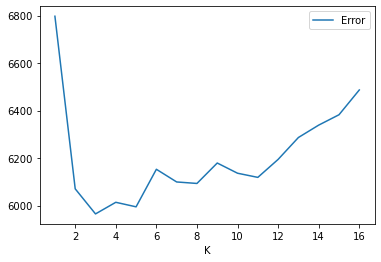

In [157]:
rmse_df.plot()
